# Tutorial 12
# Data Structures - Stack and Quene
## Tutorial Notes by Kaiyan Zheng
## kaiyanzheng@link.cuhk.edu.cn

# Classification of Data Structure
## Data structure is a representation of the logical relationship existing between individual elements of data.
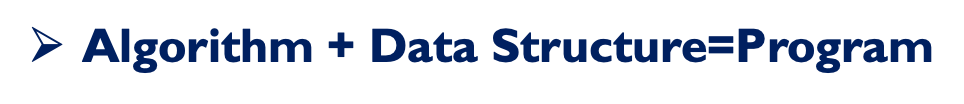
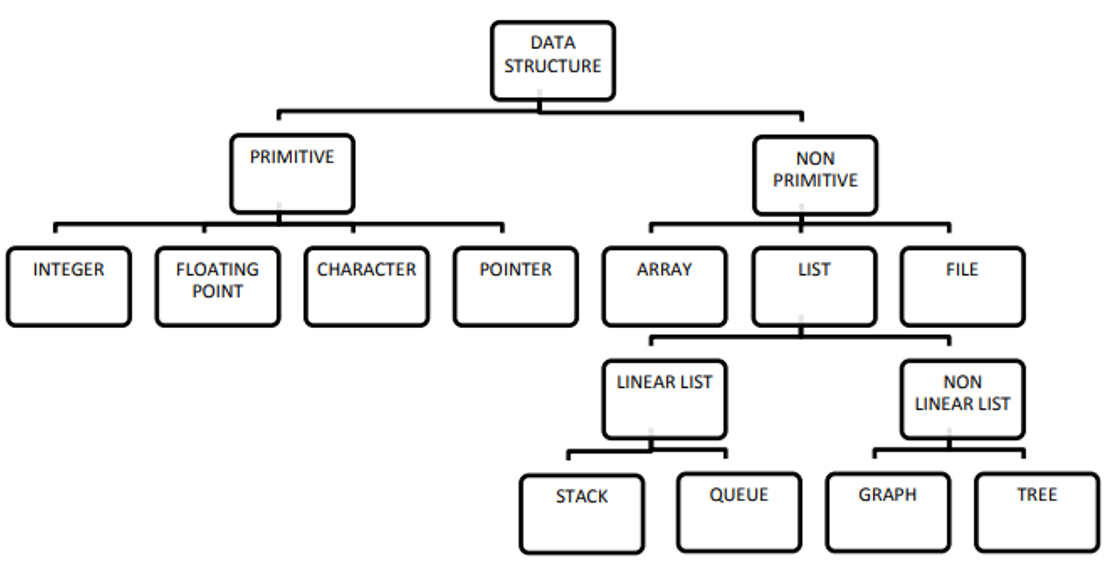

## Array stores the same data types.
## List can stores a collection of different data types, by storing all of their pointers (pointing towards their addresses), which is very space consuming. 

# Operations on Data Structure
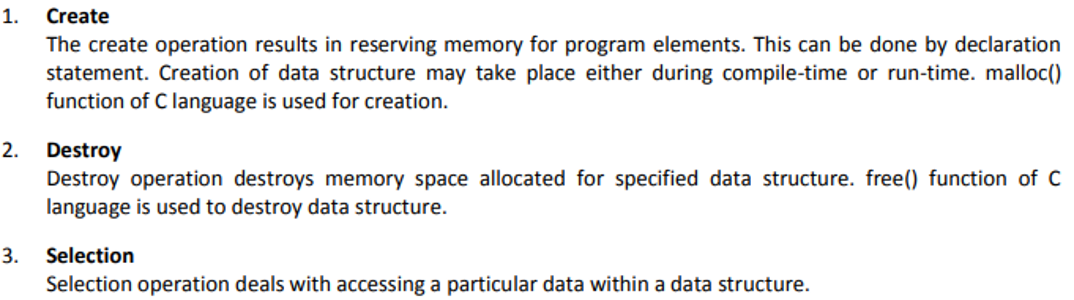
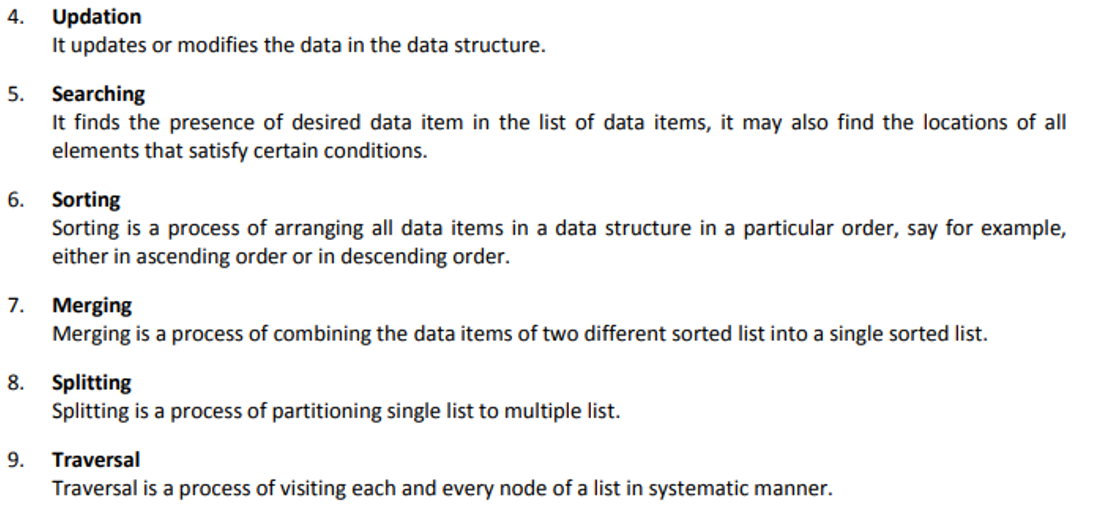

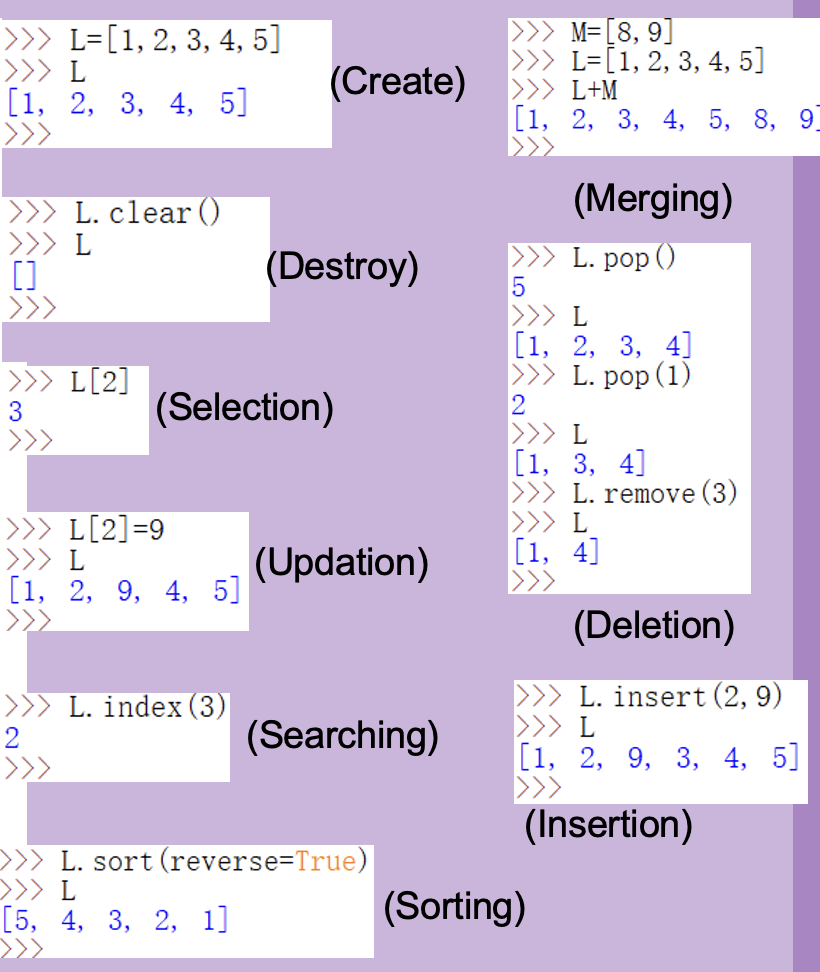


# Stack and Quene
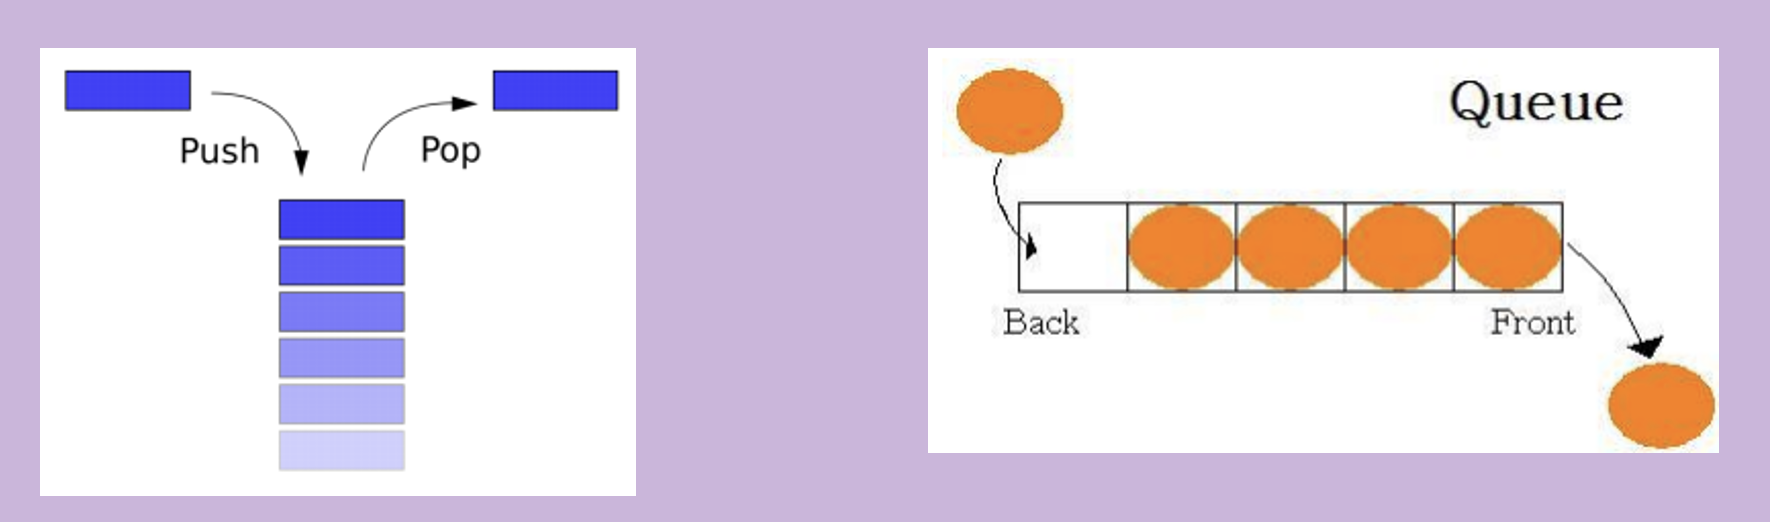
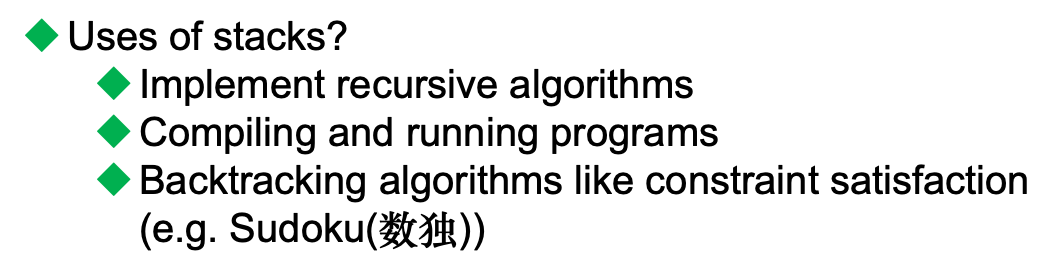
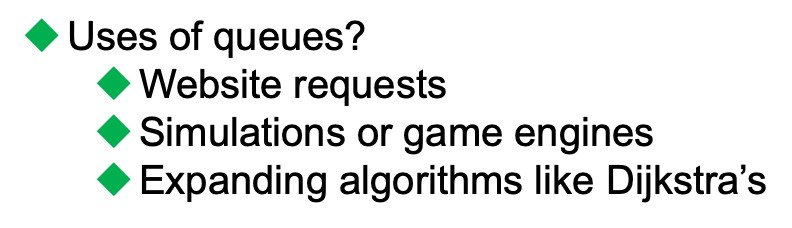


## Dijkstra's algorithm （Optional, check it after tutorial)
Dijkstra's algorithm is a popular algorithm for finding the shortest path between nodes in a graph, which may represent, for example, road networks. Here's a simple example to illustrate how Dijkstra's algorithm works:

Let's consider the following weighted graph:

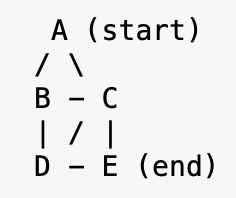


Each edge in the graph has a non-negative weight:

Edge AB: 1
Edge AC: 4
Edge BC: 2
Edge BD: 5
Edge CD: 1
Edge CE: 3
Edge DE: 7
Now, let's use Dijkstra's algorithm to find the shortest path from node A to node E.

1. Start at the initial node (A) with a tentative distance of 0, and set the distances to all other nodes to infinity.
2. Update the tentative distances to all neighboring nodes of A. In this case, update the distances to B and C.
Tentative distance to B: 1
Tentative distance to C: 4
3. Choose the node with the smallest tentative distance (B in this case) and mark it as visited.
4. Update the tentative distances to all neighboring nodes of the chosen node (B). Update the distance to D.
Tentative distance to D: 6 (1 + 5)
5. Choose the next node with the smallest tentative distance (C in this case) and mark it as visited.
Update the tentative distances to all neighboring nodes of the chosen node (C). Update the distance to D and E.
Tentative distance to D: 4 (2 + 2)
Tentative distance to E: 7 (4 + 3)
6. Choose the next node with the smallest tentative distance (D in this case) and mark it as visited.
7. Update the tentative distance to the only remaining neighboring node of D (E).
Tentative distance to E: 11 (4 + 7)
8. Choose the last remaining node (E) with the smallest tentative distance.

The algorithm terminates, and the shortest path from A to E is A -> B -> C -> D -> E, with a total distance of 11.
Dijkstra's algorithm ensures that it finds the shortest path from the start node to all other nodes in the graph. The key idea is to always choose the node with the smallest tentative distance at each step.

# Stack

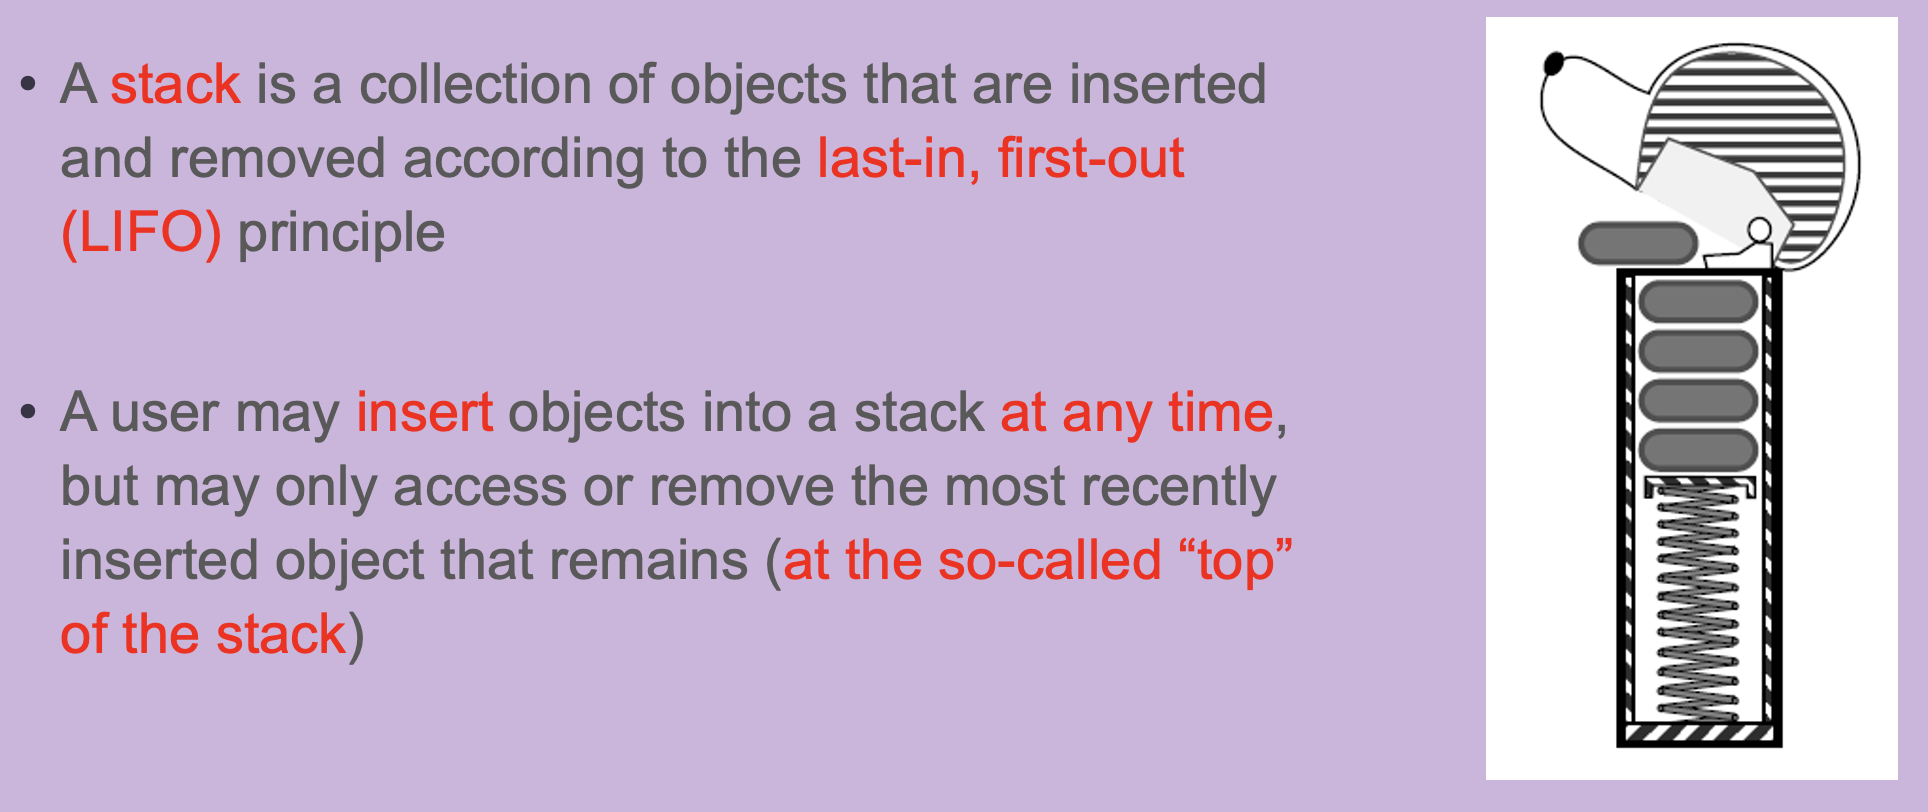

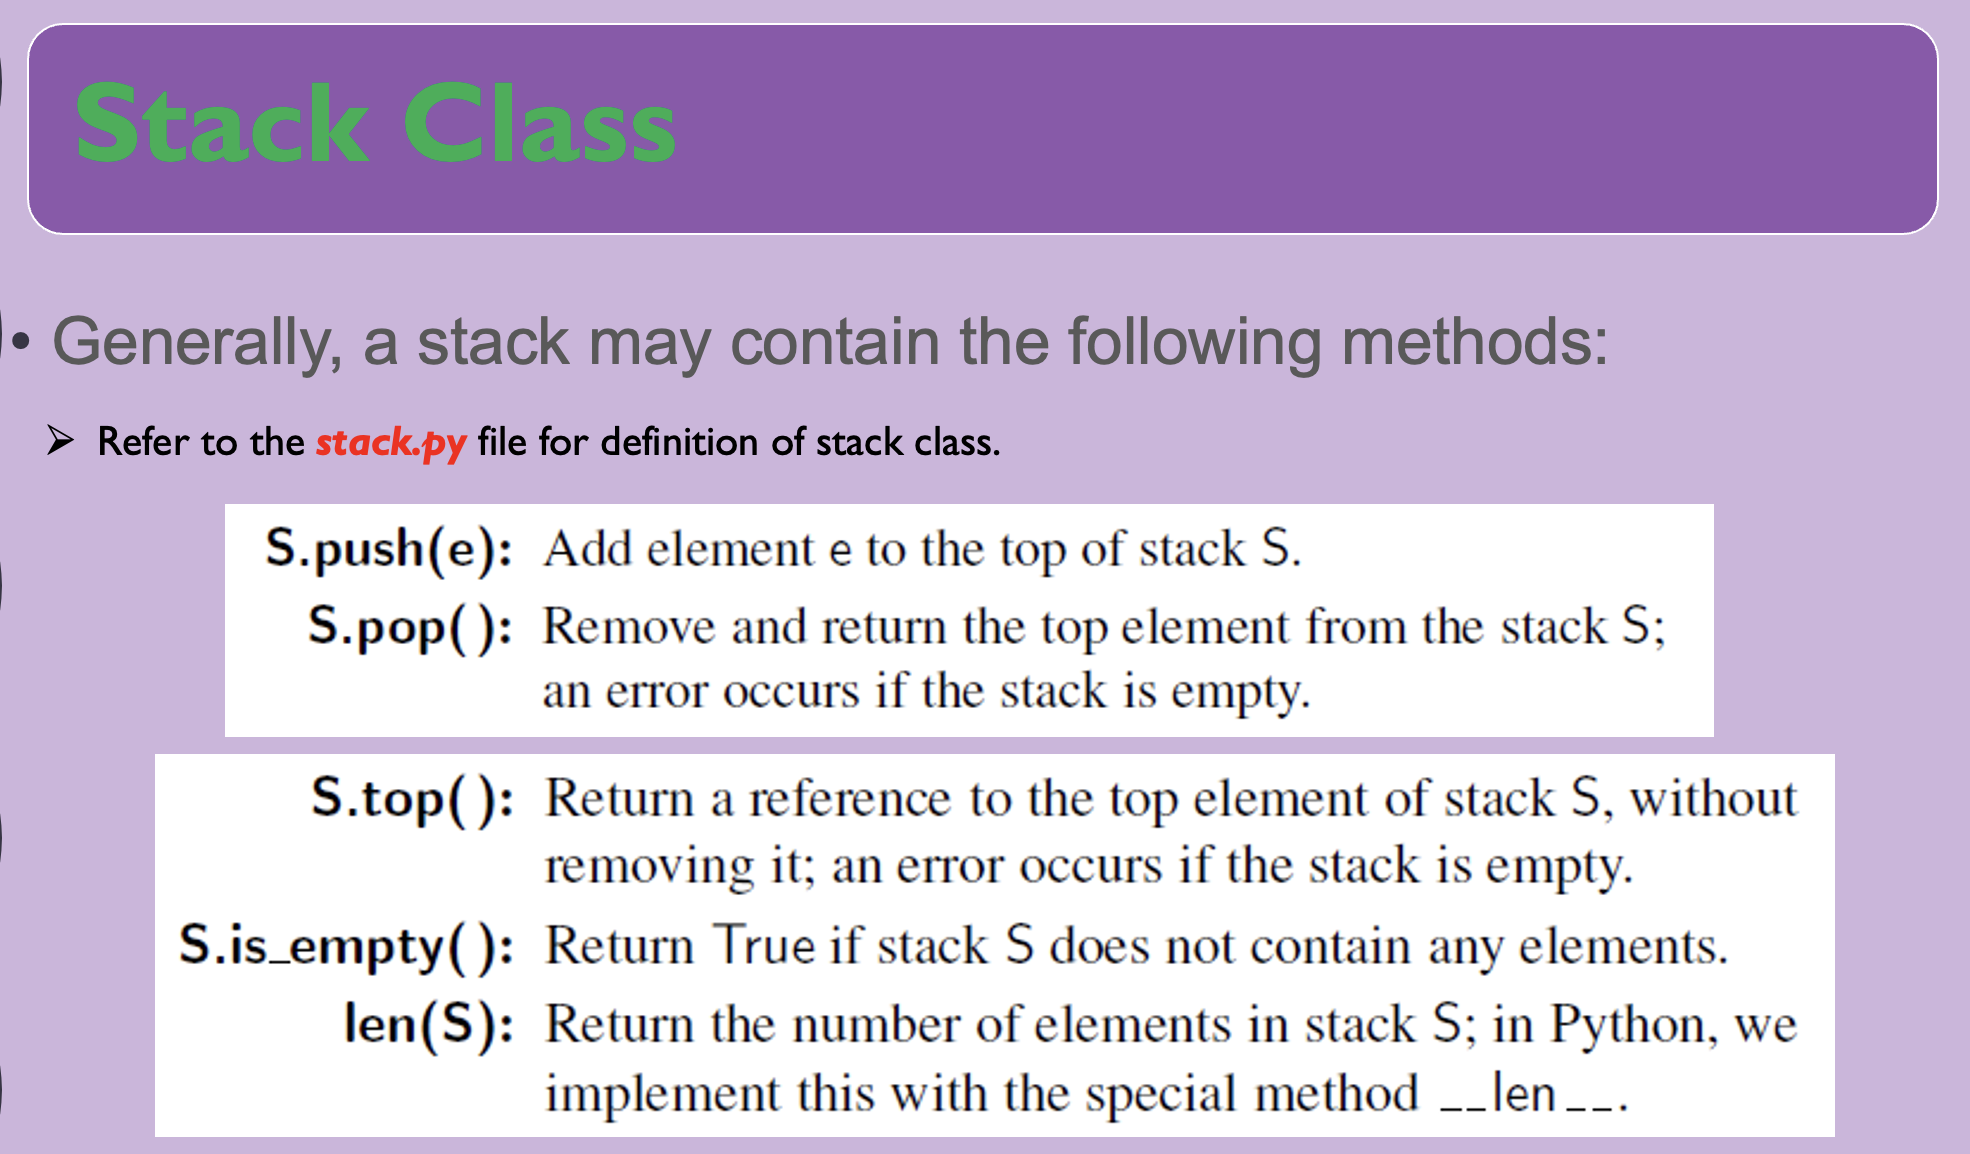

In [2]:
# Stack.py

class ListStack:
    
    def __init__(self):
        self.__data = list()

    def __len__(self):
        return len(self.__data)

    def is_empty(self):
        return len(self.__data) == 0

    def push(self,e):
        self.__data.append(e)

    def top(self):
        if self.is_empty():
            print('The stack is empty.')
        else:
            return self.__data[self.__len__()-1]

    def pop(self):
        if self.is_empty():
            print('The stack is empty.')
        else:
            return self.__data.pop()

    def __str__(self):
        return str(self.__data)
    def __repr__(self):
        return str(self)

s = ListStack()
s.push('1')
s.push('2')
s.push('3')
print(s.pop())
print(s)

3
['1', '2']


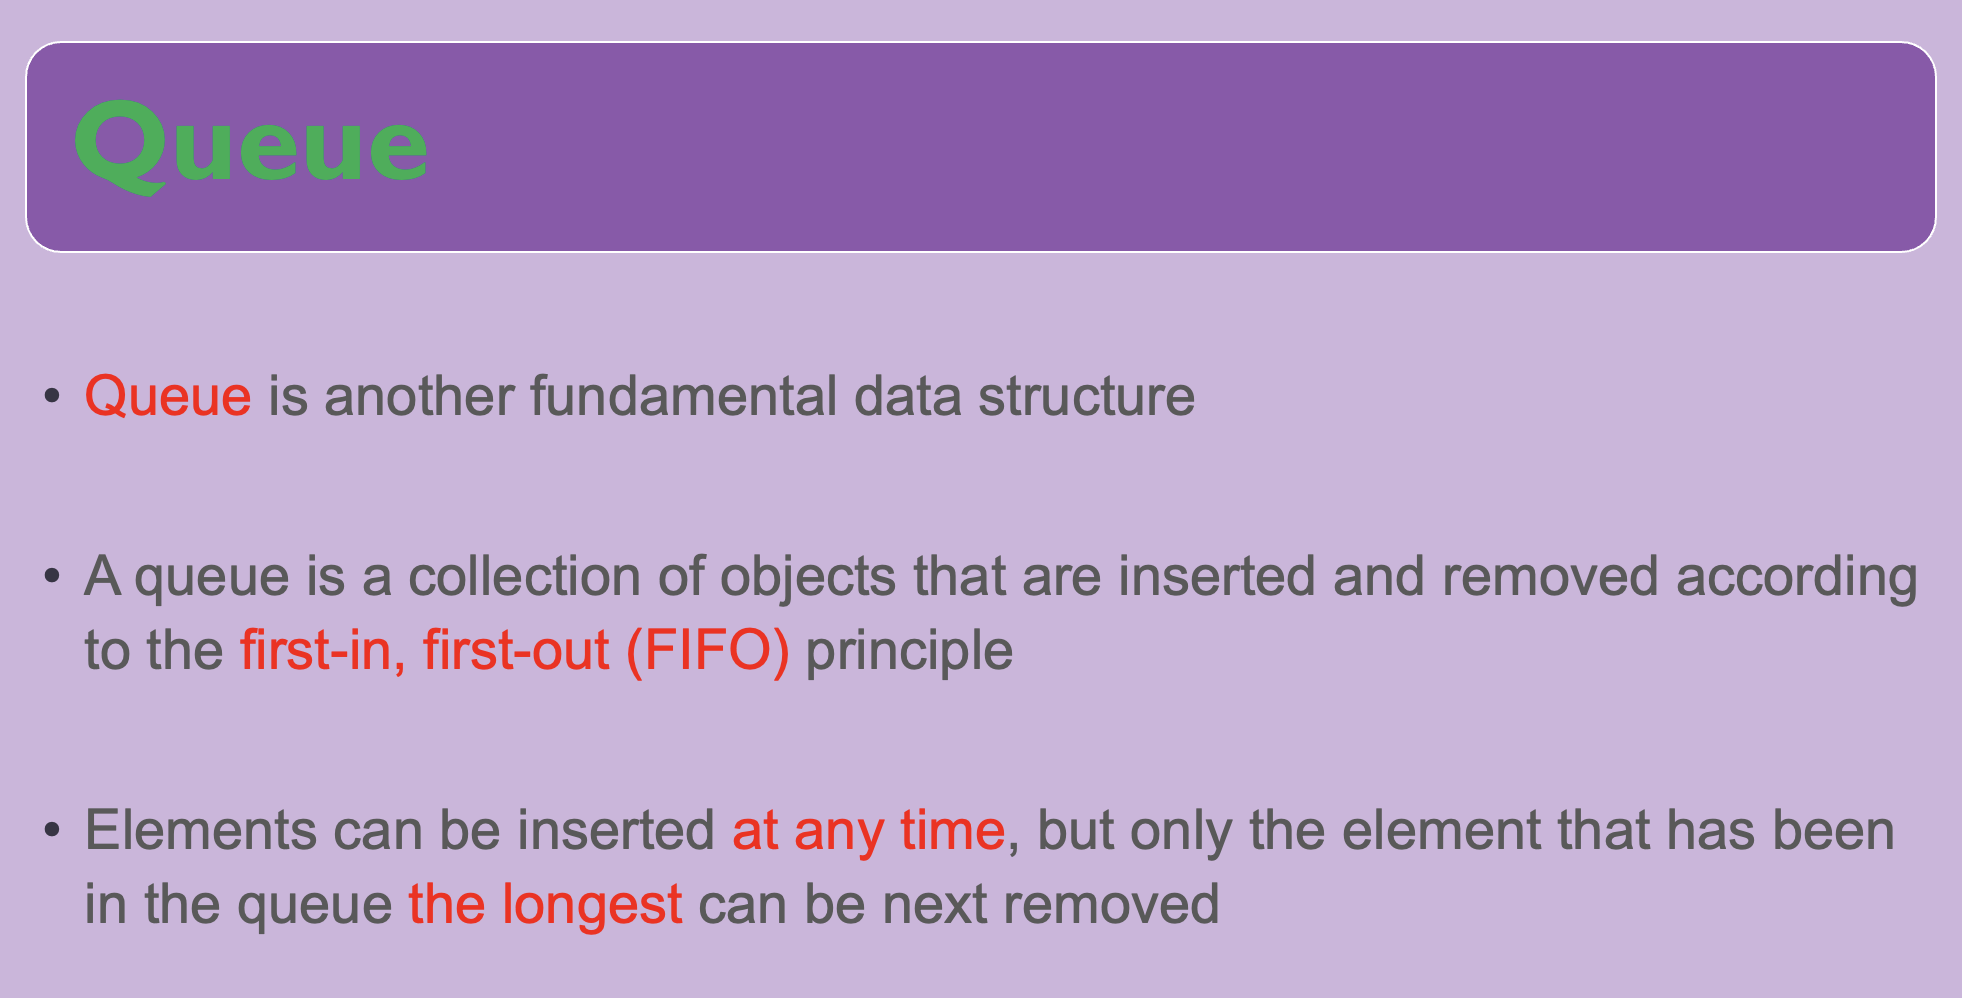

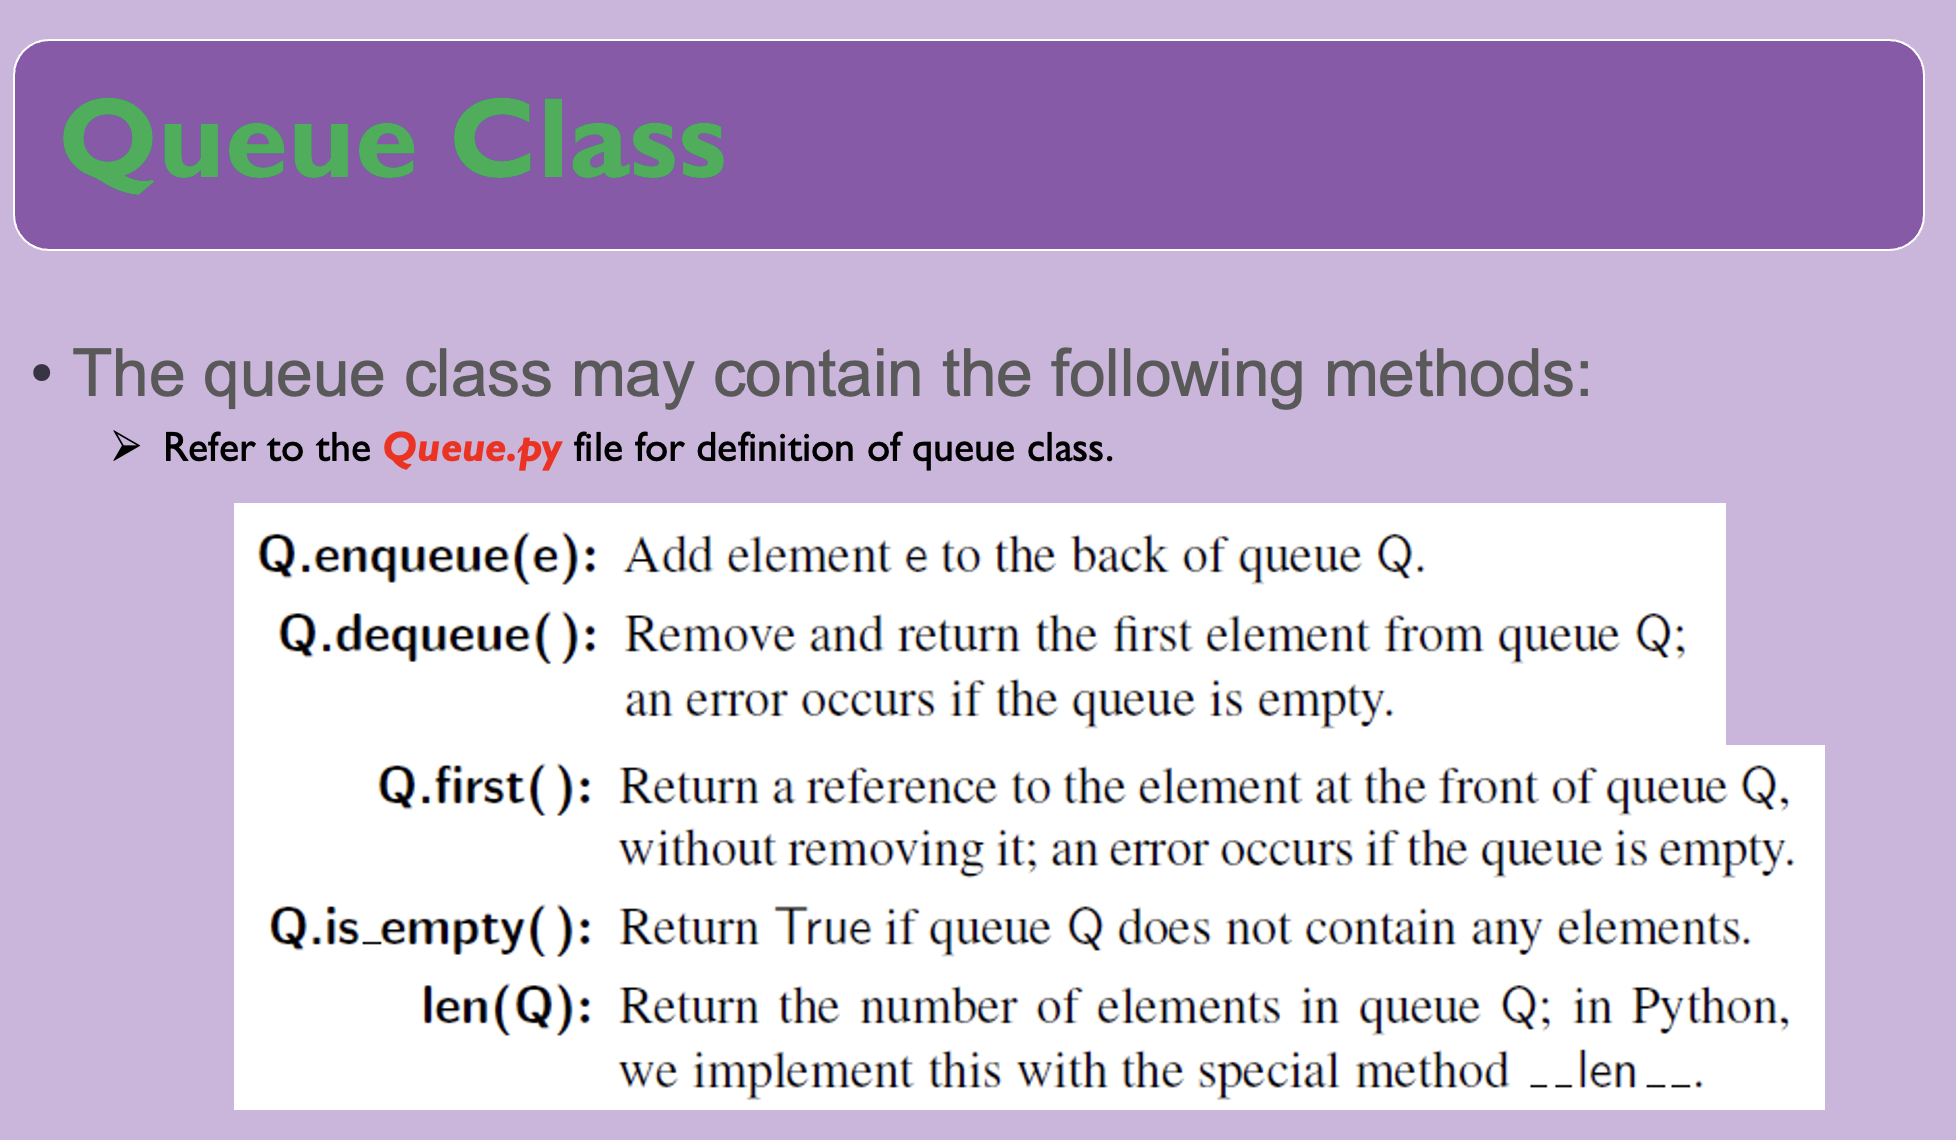

In [3]:
# Quene.py
class ListQueue:
    
    default_capacity = 100

    def __init__(self):
        self.__data = [None] * ListQueue.default_capacity
        self.__size = 0
        self.__front = 0
        self.__end = 0


    def __len__(self):
        return self.__size

    def is_empty(self):
        return self.__size == 0

    def first(self):
        if self.is_empty():
            print('Queue is empty.')
        else:
            return self.__data[self.__front]

    #This method is added because we may want to visit the element in the end
    def end(self):
        if self.is_empty():
            print('Queue is empty.')
        else:
            return self.__data[self.__end-1]

    def dequeue(self):
        if self.is_empty():
            print('Queue is empty.')
            return None
        else:
            answer = self.__data[self.__front]
            self.__data[self.__front] = None
            self.__front = (self.__front + 1) % ListQueue.default_capacity
            self.__size -= 1
            return answer

    def enqueue(self,e):
        if self.__size == ListQueue.default_capacity:
            print('The queue is full.')
        else:
            self.__data[self.__end] = e
            self.__end = (self.__end + 1) % ListQueue.default_capacity
            self.__size += 1

    def __str__(self):
        #rearrange the self.__data starting from front
        rearrangeQueue=self.__data[self.__front:]+self.__data[:self.__front]
        return str([str(e) for e in rearrangeQueue if e != None])
    
    def __repr__(self):
        return str(self)

##test program:

q=ListQueue()
q.enqueue(1)
q.enqueue(2)
q.enqueue(3)
q.enqueue(4)
q.dequeue()
print(q)

['2', '3', '4']


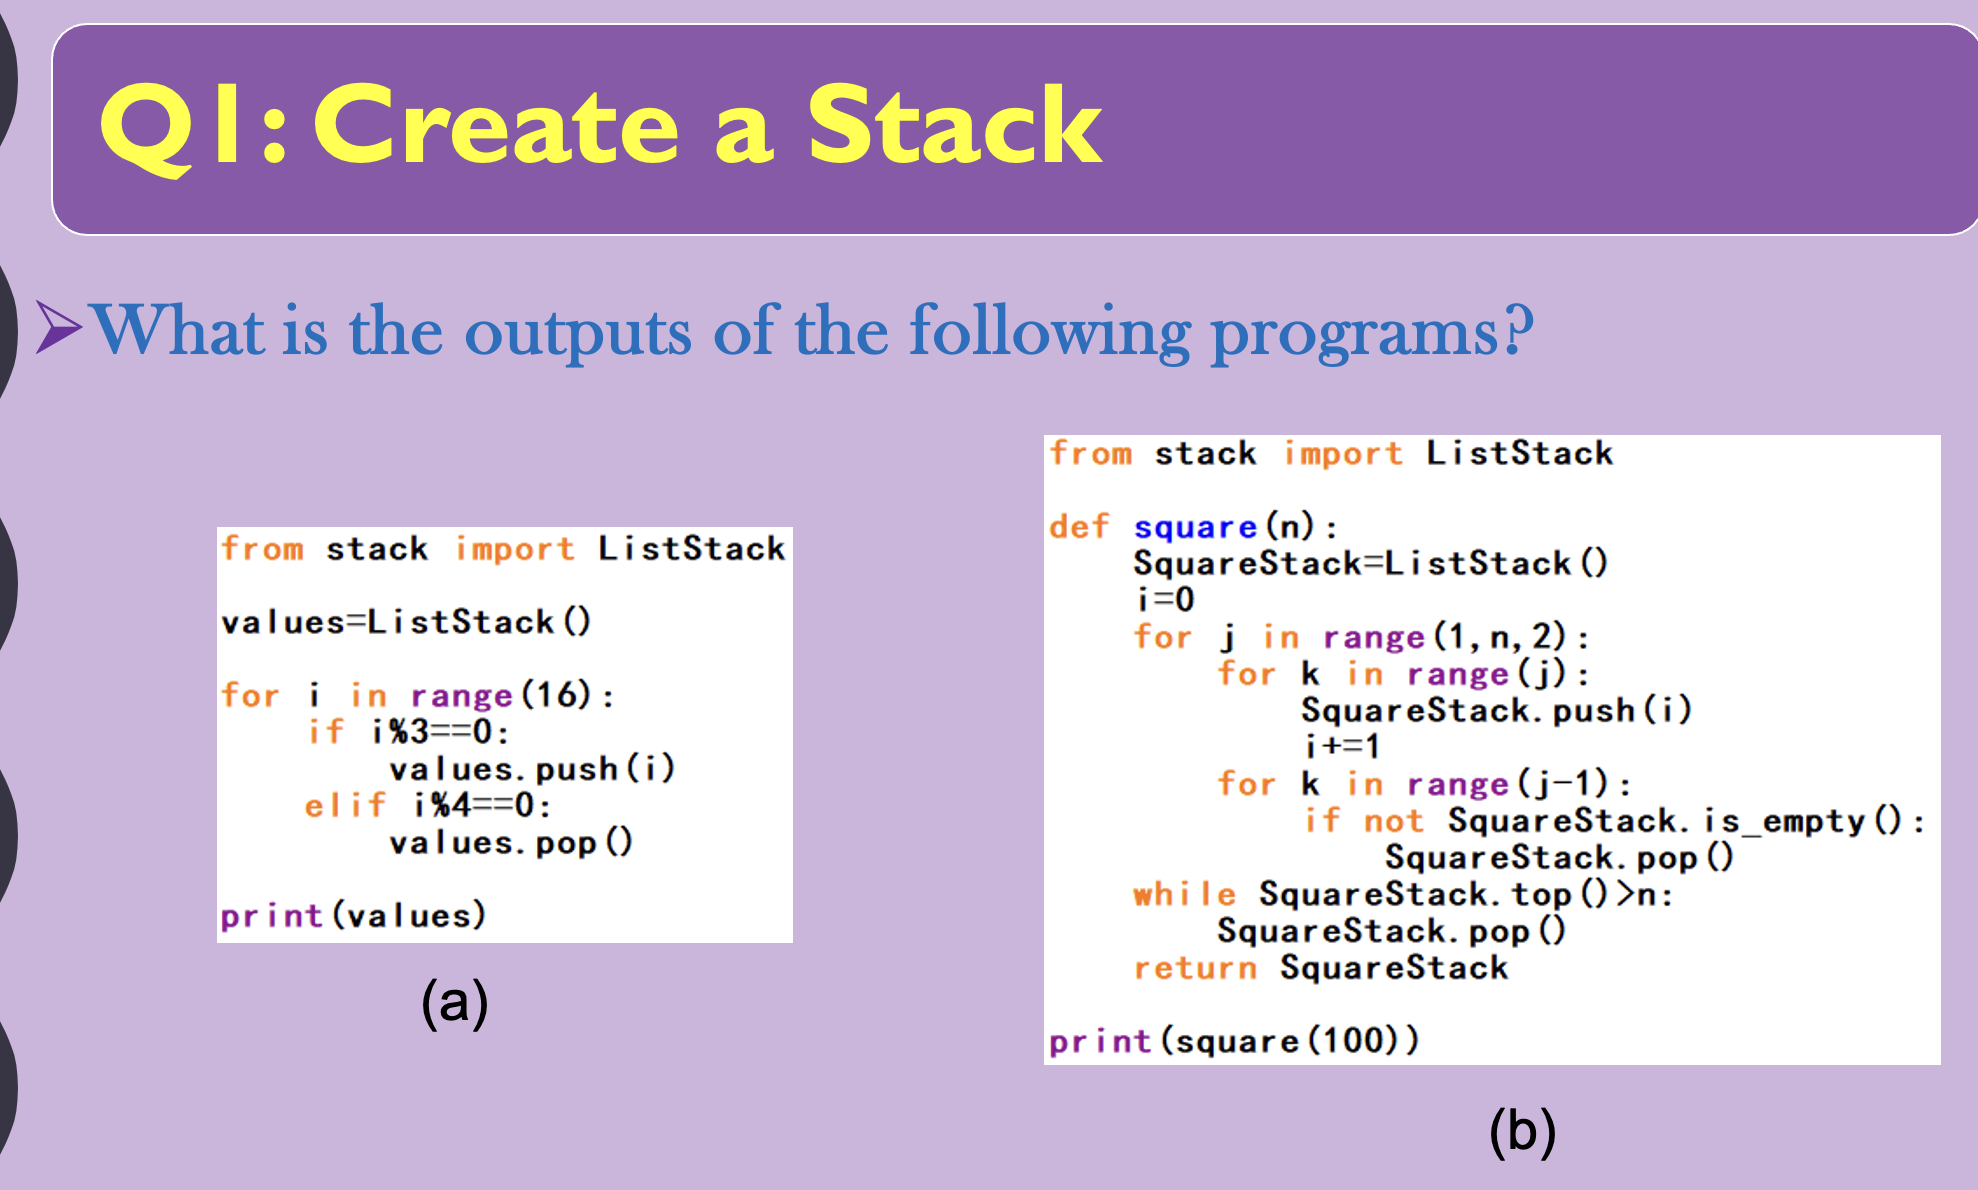

In [4]:
from stack import ListStack

values=ListStack()

for i in range(16):
    if i%3==0:
        values.push(i)
    elif i%4==0:
        values.pop()
        
print(values)


[0, 9, 12, 15]


In [5]:
from stack import ListStack

def square(n):
    SquareStack=ListStack()
    i=0
    for j in range(1,n,2):
        for k in range(j):
            SquareStack.push(i)
            i+=1
        for k in range(j-1):
            if not SquareStack.is_empty():
                SquareStack.pop()
    while SquareStack.top()>n:
        SquareStack.pop()
    return SquareStack

print(square(100))


[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


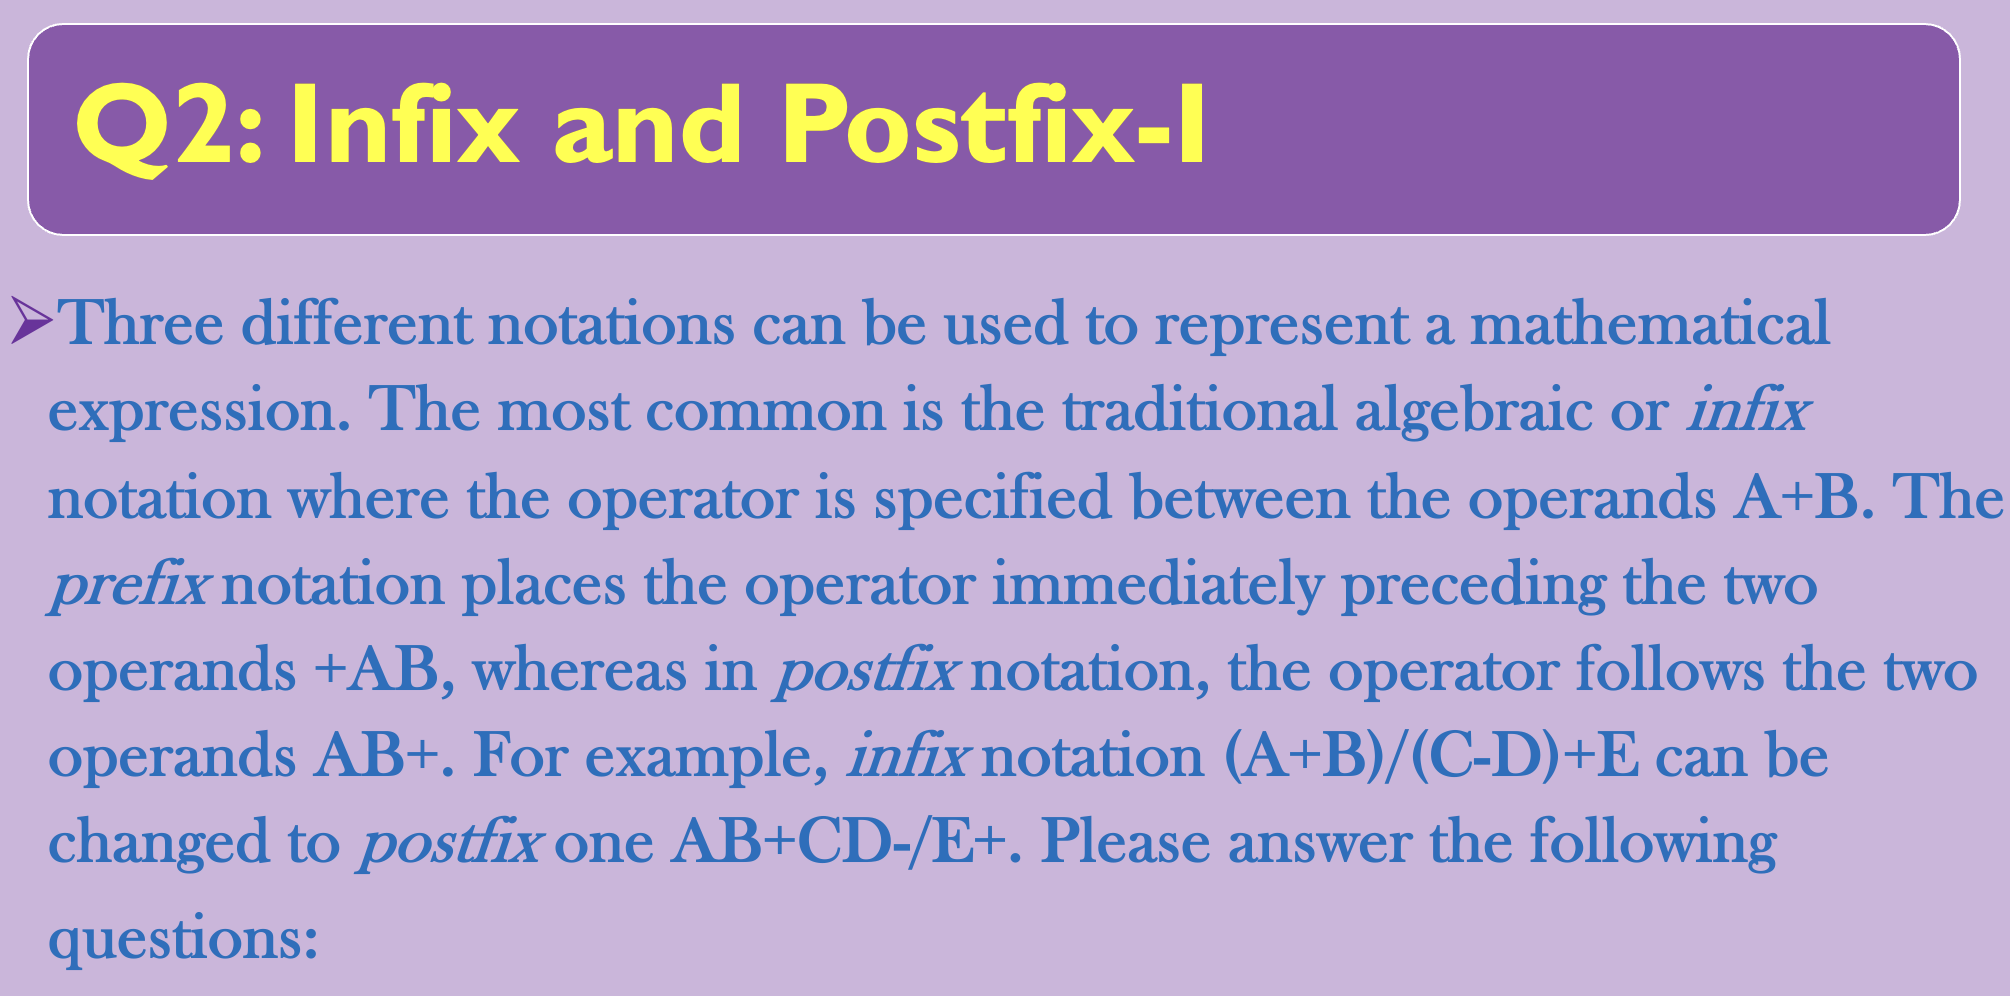

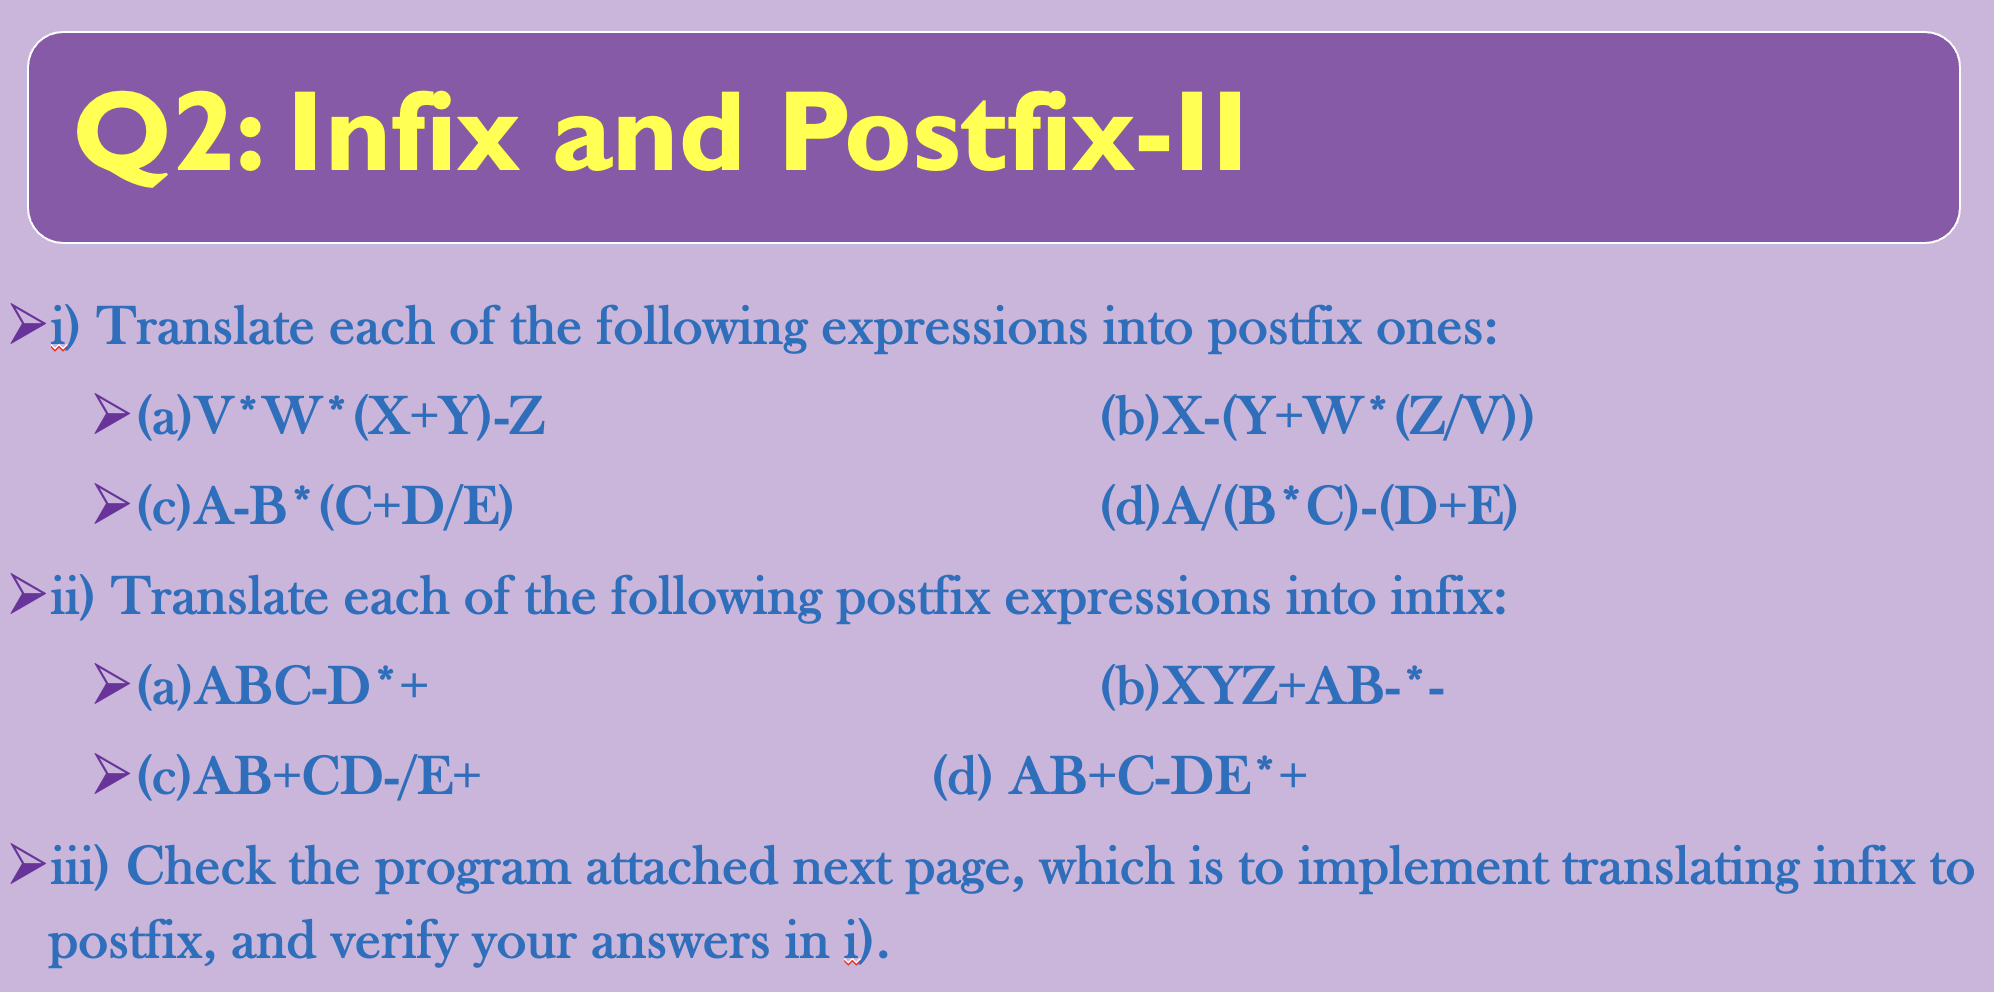

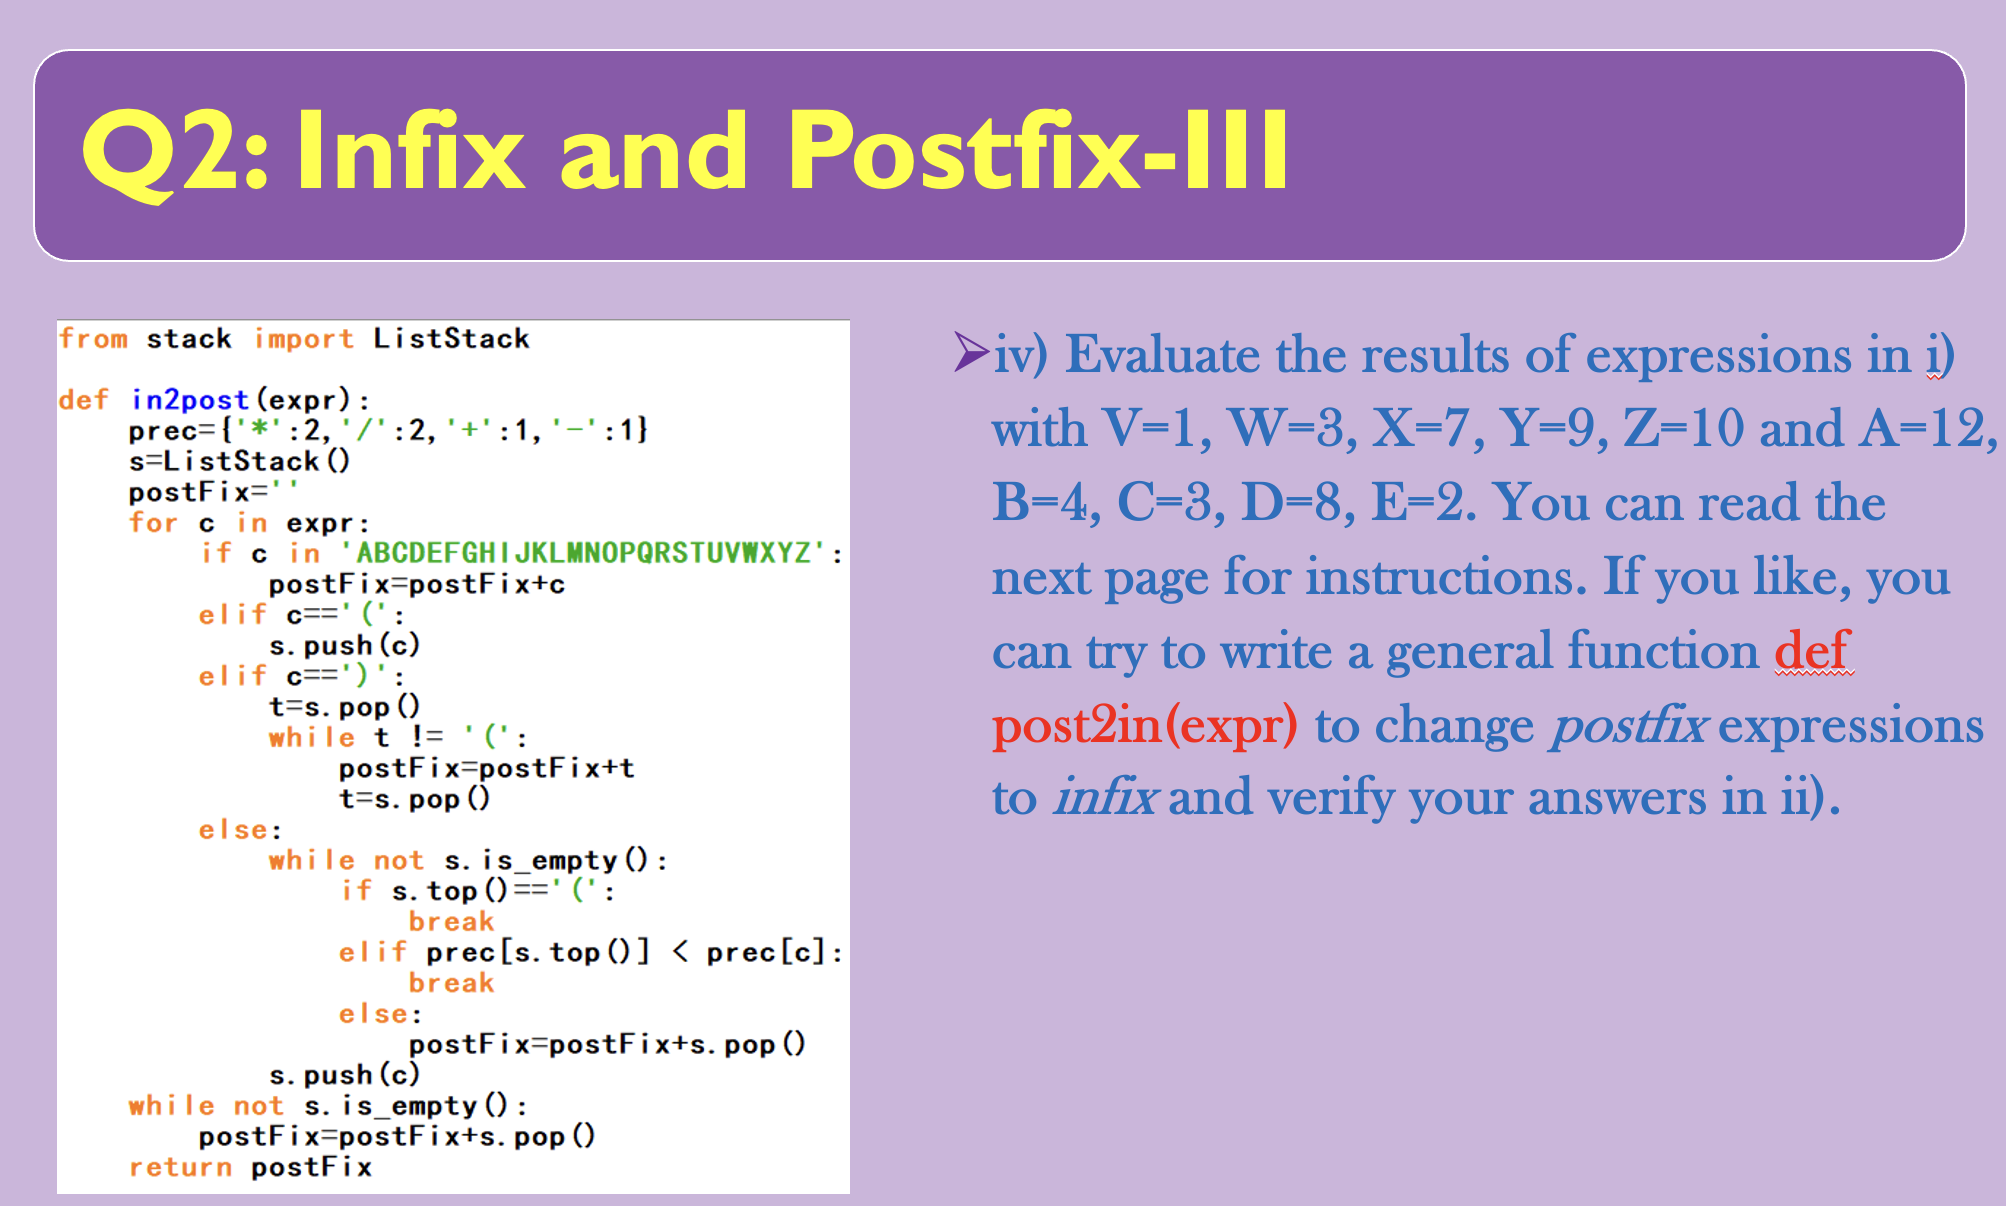

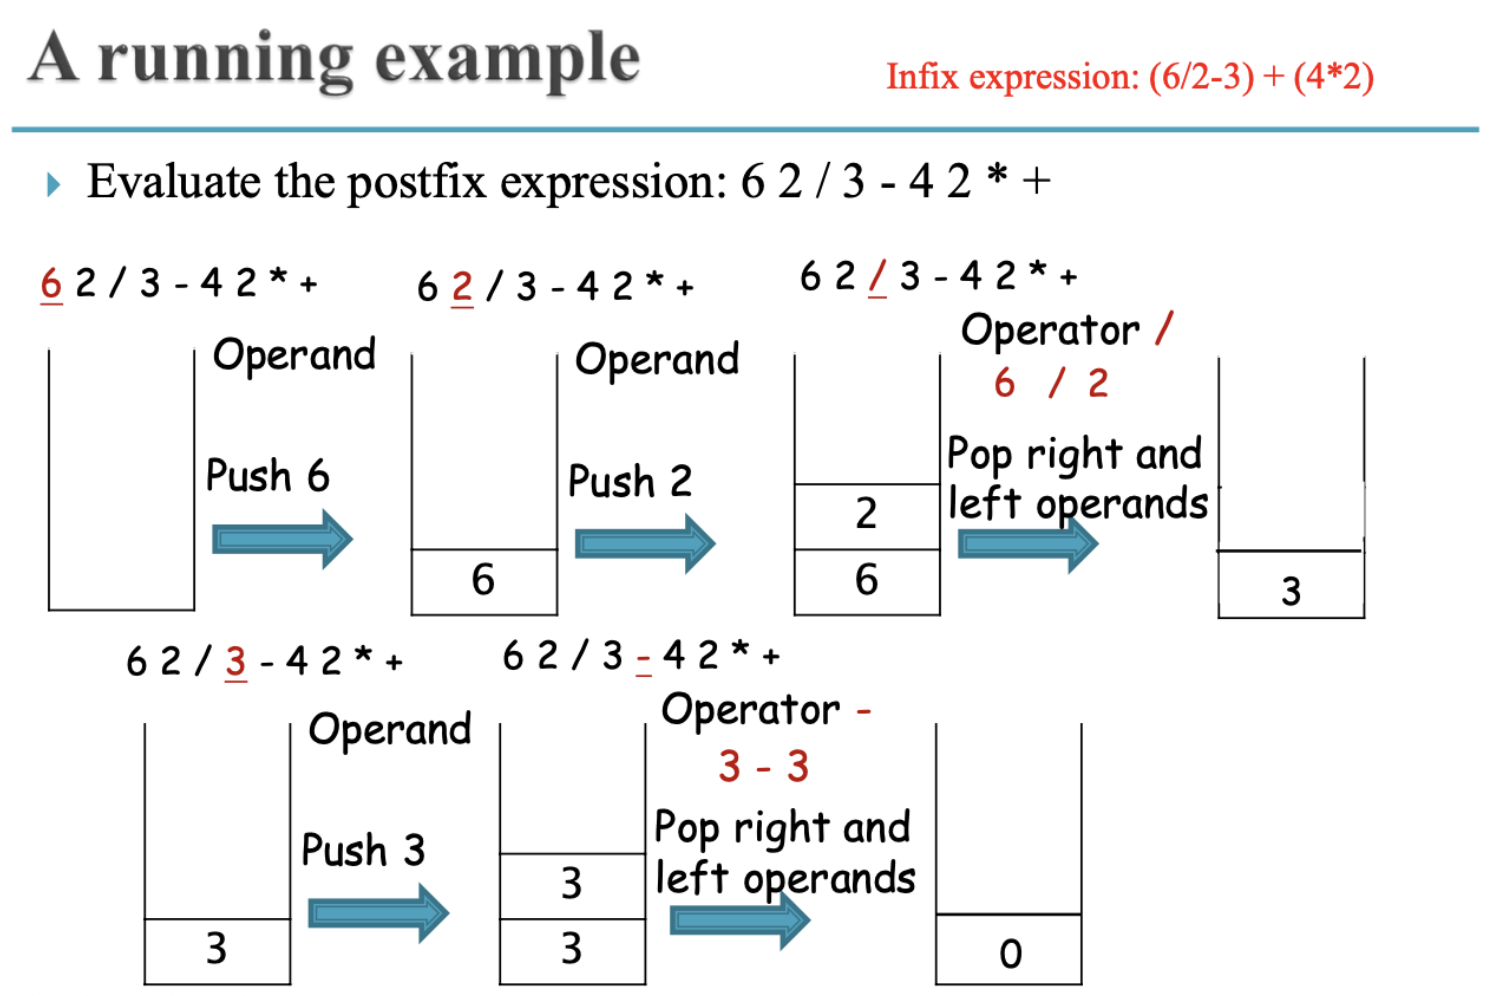

In [28]:
from stack import ListStack

def in2post(expr):
    # Dictionary defining operator precedence
    prec = {'*': 2, '/': 2, '+': 1, '-': 1}

    # Initialize a stack for operators
    s = ListStack()
    
    # Initialize an empty string to store the postfix expression
    postFix = ''

    # Iterate through each character in the infix expression
    for c in expr:
        if c in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ':
            # If the character is an operand, add it to the postfix expression
            postFix = postFix + c
        elif c == '(':
            # If the character is an opening parenthesis, push it onto the stack
            s.push(c)
        elif c == ')':
            # If the character is a closing parenthesis, pop operators from the stack
            # until an opening parenthesis is found, adding them to the postfix expression
            t = s.pop()
            while t != '(':
                postFix = postFix + t
                t = s.pop()
        else:
            # If the character is an operator
            while not s.is_empty():
                if s.top() == '(':
                    break
                elif prec[s.top()] < prec[c]:
                    break
                else:
                    # Pop operators with higher or equal precedence from the stack
                    # and add them to the postfix expression
                    postFix = postFix + s.pop()
            # Push the current operator onto the stack
            s.push(c)

    # Pop any remaining operators from the stack and add them to the postfix expression
    while not s.is_empty():
        postFix = postFix + s.pop()

    # Return the final postfix expression
    return postFix

# Test cases
print(in2post('V*W*(X+Y)-Z'))
print(in2post('X-(Y+W*(Z/V))'))
print(in2post('A-B*(C+D/E)'))
print(in2post('A/(B*C)-(D+E)'))


VW*XY+*Z-
XYWZV/*+-
ABCDE/+*-
ABC*/DE+-


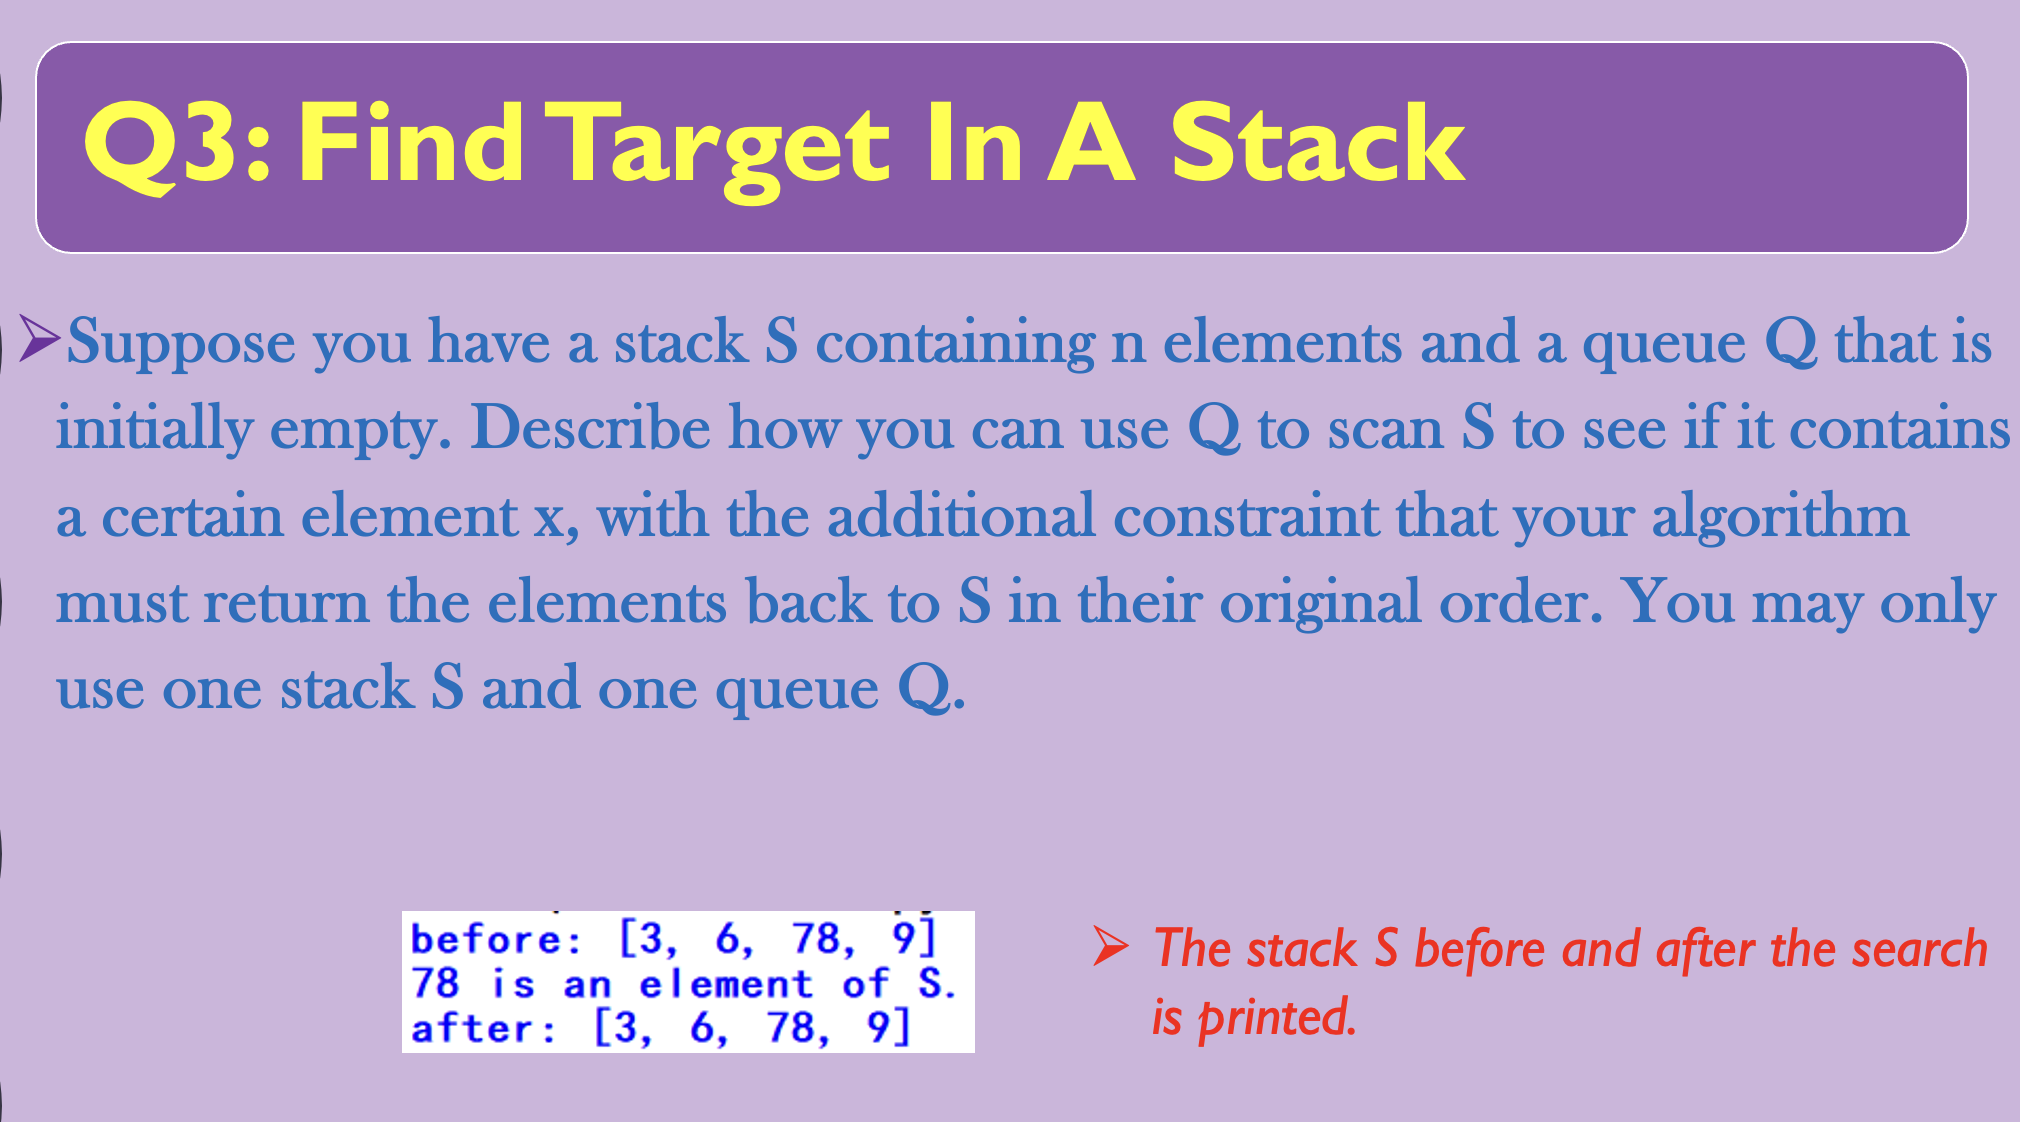

In [11]:
from stack import ListStack
from Queue import ListQueue

def CheckElement(S, Q, e):
    # Check if the stack S is empty
    if S.is_empty():
        print(e, 'is not an element of S.')
    else:
        # Pop an element from the stack S
        element = S.pop()
        # Enqueue the popped element into the queue Q
        Q.enqueue(element)
        # Check if the popped element is equal to the target element e
        if element == e:
            print(e, 'is an element of S.')
        else:
            # If not equal, recursively call CheckElement with the updated stack and queue
            return CheckElement(S, Q, e)
    
    # Get the length of the queue Q
    length = len(Q)
    # Dequeue elements from Q and push them back onto stack S
    for i in range(length):
        S.push(Q.dequeue())
    # Repeat the above process to restore the original order in the stack S
    for i in range(length):
        Q.enqueue(S.pop())
    for i in range(length):
        S.push(Q.dequeue())
    
    # Return the final state of the stack S
    return S

# Create a stack S, a queue Q, and push some elements onto S
S = ListStack()
Q = ListQueue()
S.push(3)
S.push(6)
S.push(78)
S.push(9)
# Display the state of S before and after calling CheckElement
print('before:', S)
print('after:', CheckElement(S, Q, 78))


before: [3, 6, 78, 9]
78 is an element of S.
after: [3, 6, 78, 9]


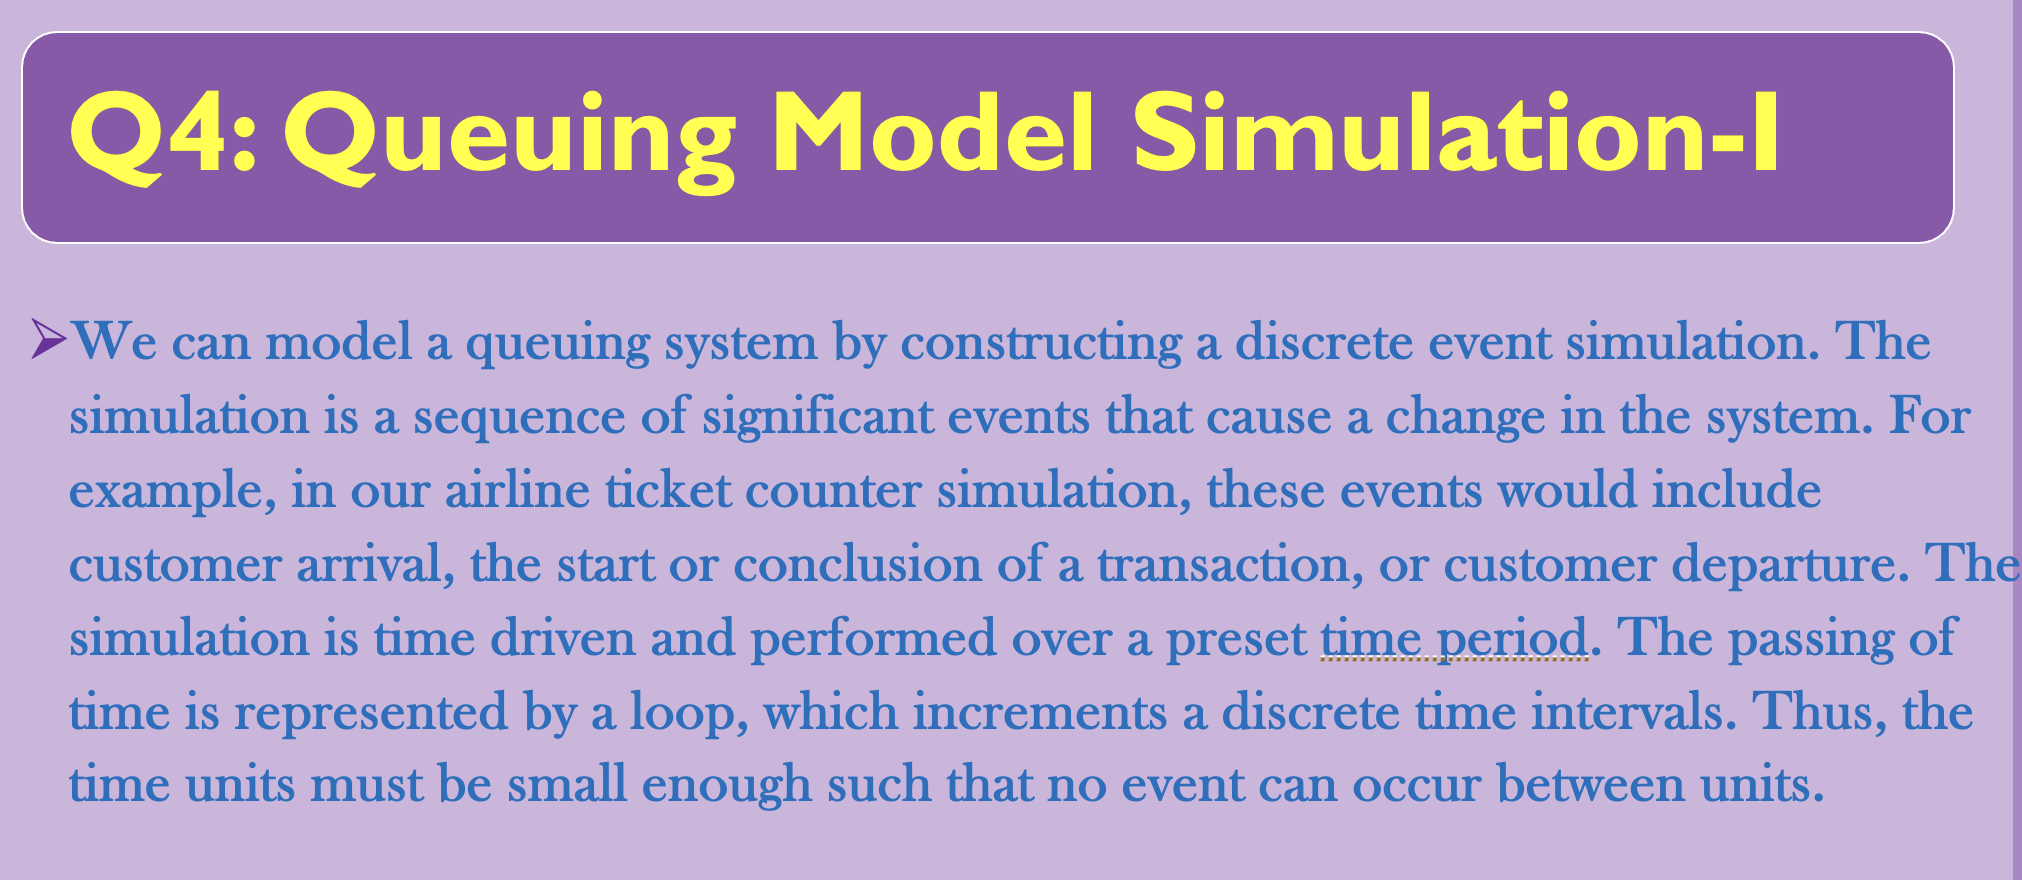

In [29]:
# Customer class:

class Customer:
    def __init__(self, idNum,curTime) -> None:
        self.idNum = idNum
        self.curTime = curTime
    
    def getidNum(self, ):
        return self.idNum
    
    def getarrivalTime(self, ):
        return self.curTime

In [30]:
from Queue import ListQueue
from Customer import Customer
from Server import Server
from arrivalTime import arrivalTime
from math import exp
from random import random

# Time unit in seconds
timeUnit = 0.1

# Number of time units in 1 minute
NumUnit = int(60 / timeUnit)

# Total simulation time in minutes
totalTime = 120
totalTime *= NumUnit

class Simulation:
    def __init__(self, lamda, mu, totalTime):
        # Parameters supplied by the user
        self.__lamda = lamda
        self.__mu = mu
        self.__totalTime = totalTime
        # Simulation components
        self.__CustomerQ = ListQueue()
        # Computed during the simulation
        self.__totalWaitTime = 0
        self.__numCustomers = 0

    def run(self):
        # Initialize server and customer ID
        self.server = Server()
        self.idNum = 1

        # Simulation loop
        for curTime in range(self.__totalTime + 1):
            self.__handleArrival(curTime)
            self.__handleBeginService(curTime)
            self.__handleEndService(curTime)
            # Uncomment the following line to print current time and customer queue at each step
            # print('current time:', curTime)
            # print(self.__CustomerQ)

    def getaverageWaitTime(self):
        # Calculate average waiting time per customer
        numServed = self.__numCustomers - len(self.__CustomerQ)
        return float(self.__totalWaitTime / NumUnit) / numServed

    def getlenQueue(self):
        # Get the length of the customer queue
        return len(self.__CustomerQ)

    def printResults(self):
        # Print simulation results
        numServed = self.__numCustomers - len(self.__CustomerQ)
        avgWait = float(self.__totalWaitTime / NumUnit) / numServed
        print("Total number of customers =", self.__numCustomers)
        print("Number of customers served =", numServed)
        print("Number of customers remaining in line = %d" % len(self.__CustomerQ))
        print("The average wait time was %4.2f mins." % avgWait)

    def __handleArrival(self, curTime):
        # Handle customer arrival events
        if curTime == 0:
            self.arTime = arrivalTime(self.__lamda, timeUnit)
            # To store the time when the previous customer arrives
            self.customerarTime = 0
            # Uncomment the following line to print arrival time and current time
            # print('arTime:', self.arTime, 'current time:', curTime)
        else:
            if curTime == self.customerarTime + self.arTime:
                c = Customer(self.idNum, curTime)
                self.__CustomerQ.enqueue(c)
                self.__numCustomers += 1
                self.idNum += 1
                self.customerarTime = curTime
                self.arTime = arrivalTime(self.__lamda, timeUnit)
                # Uncomment the following line to print arrival time and current time
                # print('arTime:', self.arTime, 'current time:', curTime)

    def __handleBeginService(self, curTime):
        # Handle the beginning of customer service
        if not self.__CustomerQ.is_empty() and self.server.getservedCustomer() is None:
            customer = self.__CustomerQ.first()
            # Begin to serve the first arrival customer when he arrives
            if customer.getidNum() == 1:
                if curTime == customer.getarrivalTime():
                    # Generate the service time for the first arrival
                    self.serTime = arrivalTime(self.__mu, timeUnit)
                    # Uncomment the following line to print service time and current time
                    # print('serTime:', self.serTime, 'current time:', curTime)
                    self.server.startService(customer, curTime + self.serTime)
            else:
                self.server.startService(customer, curTime + self.serTime)

    def __handleEndService(self, curTime):
        # Handle the end of customer service
        if curTime == self.server.getstopTime():
            customer = self.server.stopService()
            self.serTime = arrivalTime(self.__mu, timeUnit)
            # Uncomment the following line to print service time and current time
            # print('serTime:', self.serTime, 'current time:', curTime)
            # Waiting time is the time after served minus the time he arrives
            self.__totalWaitTime += curTime - customer.getarrivalTime()
            self.__CustomerQ.dequeue()

In [31]:
###①test to look at the queue for at every time, uncomment the 6 print functions at #①~⑥print
###timUnit=1second
timeUnit=1
totalTime=30
simulation=Simulation(9,10,totalTime)
simulation.run()
simulation.printResults()

Total number of customers = 8
Number of customers served = 3
Number of customers remaining in line = 5
The average wait time was 0.01 mins.


In [32]:
# #②test--to find out the length of queue after a long time, and average waiting time for each customer
def main():
    simulation=Simulation(9,10,totalTime)
    simulation.run()
    simulation.printResults()

main()

Total number of customers = 3
Number of customers served = 2
Number of customers remaining in line = 1
The average wait time was 0.01 mins.


In [33]:
#③test--to run for many times and average the length of queue and average waiting time, to compare with the theoretical result L=9, WT=0.9mins
def main():
   averageLenQueue=0
   averageWaitTime=0
   numSimulation=1000
   for i in range(numSimulation):
       simulation=Simulation(9,10,totalTime)
       simulation.run()
       averageLenQueue+=simulation.getlenQueue()
       averageWaitTime+=simulation.getaverageWaitTime()
   averageLenQueue/=numSimulation
   averageWaitTime/=numSimulation
   print('Average Length of Queue:',averageLenQueue)
   print('Average Waiting Time for each customer:',averageWaitTime)

main()


Average Length of Queue: 2.189
Average Waiting Time for each customer: 0.010721069444444443
